In [28]:
import re
import pylab as p
import numpy as np
import pandas as pd

from collections import Counter
import matplotlib.pyplot as plot
from sklearn.metrics import mean_squared_error

!pip install cryptocmd
from cryptocmd import CmcScraper

#importing packages for the prediction of time-series data
import statsmodels.api as smapi
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')
plot.style.use('seaborn-poster')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [30]:
# Preprocessing the data
#IMPORTING THE DATA 
scraper = CmcScraper('BTC', '01-04-2017', '01-05-2023')
#CONVERTING INTO DATAFRAMES
df = scraper.get_dataframe()
# df.sort_values(by='Date', inplace=True)
# print(df.head())

In [31]:
from IPython import display

# Display the DataFrame
display.display(df)

# Adjust the output height to 300px.
display.Javascript("google.colab.output.setIframeHeight('300px');")

,Date,Open,High,Low,Close,Volume,Market Cap
0,2023-05-01,29227.103982,29329.936221,27680.792640,28091.568804,1.865560e+10,5.439007e+11
1,2023-04-30,29245.515512,29952.028553,29114.021236,29268.807043,1.465220e+10,5.666613e+11
2,2023-04-29,29336.567035,29452.455245,29088.042336,29248.488373,1.066263e+10,5.662405e+11
3,2023-04-28,29481.013535,29572.791693,28929.608542,29340.262498,1.754446e+10,5.679930e+11
4,2023-04-27,28428.464279,29871.546352,28402.887387,29473.786184,2.715345e+10,5.705502e+11
...,...,...,...,...,...,...,...
2217,2017-04-05,1134.140015,1135.089966,1113.630005,1124.780029,4.147840e+08,1.828586e+10
2218,2017-04-04,1145.520020,1156.439941,1120.520020,1133.250000,4.363100e+08,1.842126e+10
2219,2017-04-03,1102.949951,1151.739990,1102.949951,1143.810059,5.804440e+08,1.859116e+10
2220,2017-04-02,1080.609985,1107.589966,1075.449951,1102.170044,5.141870e+08,1.791192e+10


<IPython.core.display.Javascript object>

In [32]:
data = df['Close']
Date = df['Date']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2222 non-null   datetime64[ns]
 1   Open        2222 non-null   float64       
 2   High        2222 non-null   float64       
 3   Low         2222 non-null   float64       
 4   Close       2222 non-null   float64       
 5   Volume      2222 non-null   float64       
 6   Market Cap  2222 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 121.6 KB
None


In [33]:
print(data)

0       28091.568804
1       29268.807043
2       29248.488373
3       29340.262498
4       29473.786184
            ...     
2217     1124.780029
2218     1133.250000
2219     1143.810059
2220     1102.170044
2221     1080.500000
Name: Close, Length: 2222, dtype: float64


In [34]:
train = df[['Date','Close']]
# train = train.resample('M').mean()
print(train.tail())

           Date        Close
2217 2017-04-05  1124.780029
2218 2017-04-04  1133.250000
2219 2017-04-03  1143.810059
2220 2017-04-02  1102.170044
2221 2017-04-01  1080.500000


In [35]:
# Setting the Date as Index
train_set = train.set_index('Date')
train_set.sort_index(ascending=True, inplace=True)

print (type(train_set))

print (train_set.head())

<class 'pandas.core.frame.DataFrame'>
                  Close
Date                   
2017-04-01  1080.500000
2017-04-02  1102.170044
2017-04-03  1143.810059
2017-04-04  1133.250000
2017-04-05  1124.780029


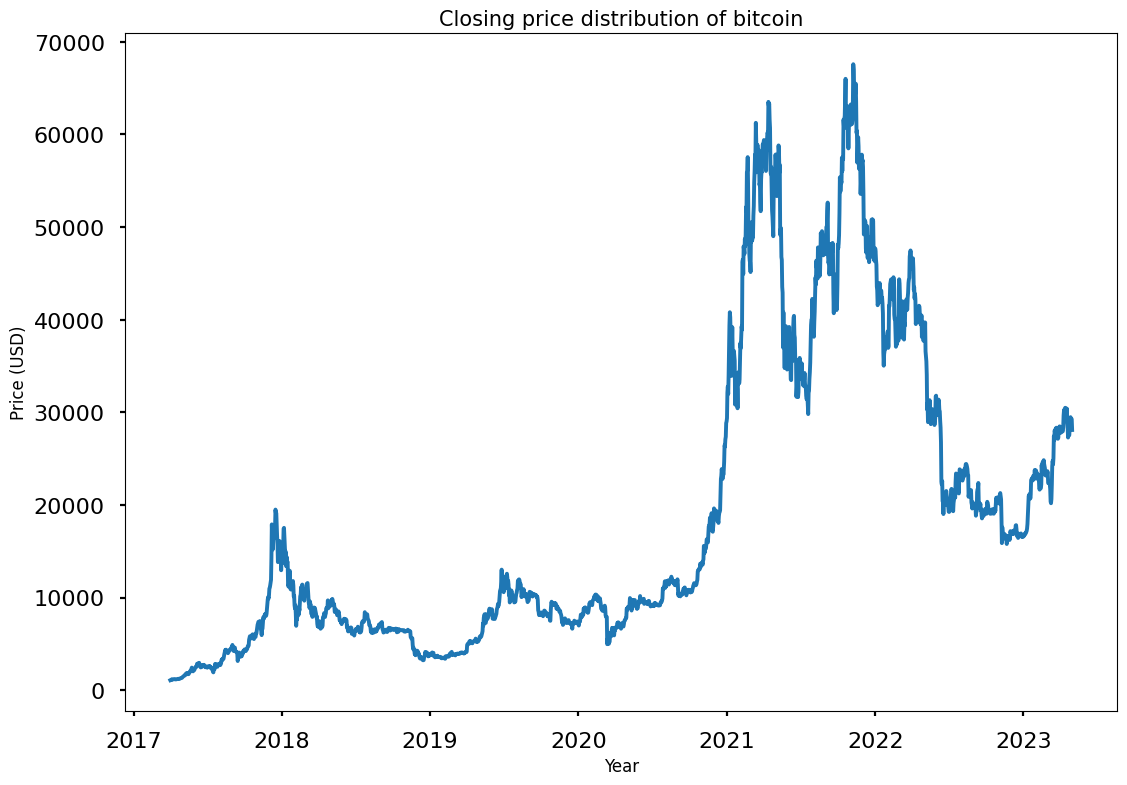

In [36]:
plot.plot(train_set)
plot.xlabel('Year', fontsize=12)
plot.ylabel('Price (USD)', fontsize=12)
plot.title("Closing price distribution of bitcoin", fontsize=15)
plot.show()

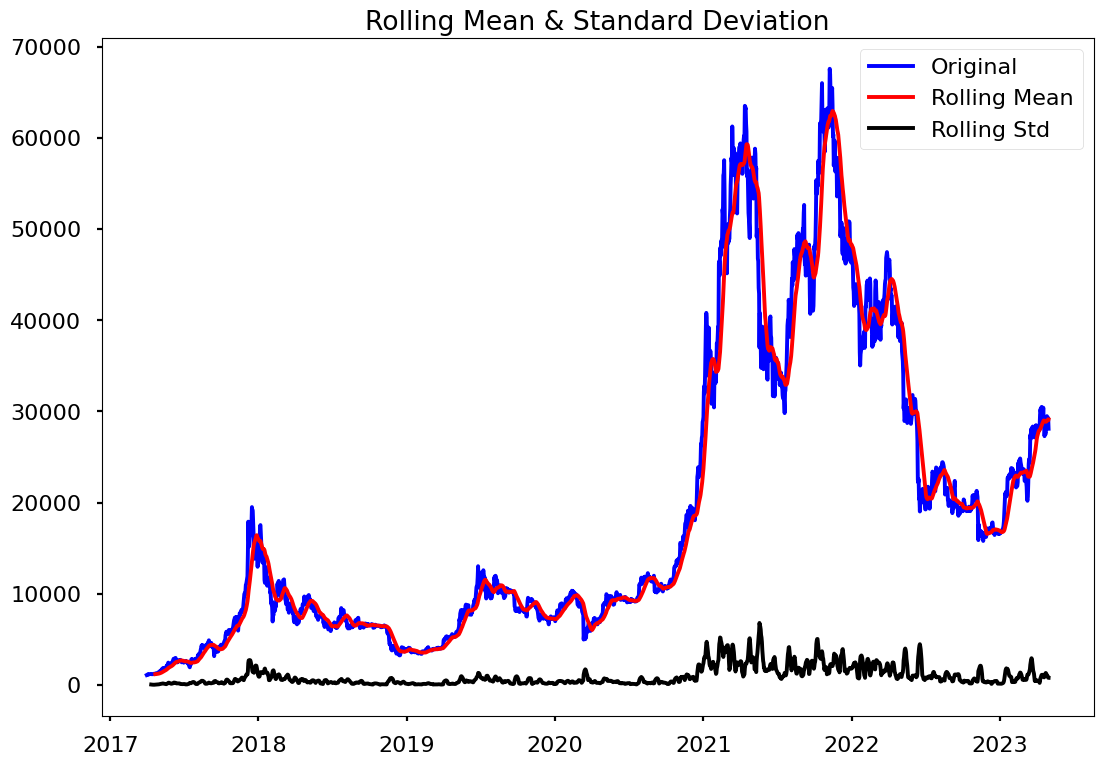

ADF Stastistic: -1.682424
p-value: 0.440190
The data is non stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [37]:
from statsmodels.tsa.stattools import adfuller

def AUGMENTED_DICKY_FULLER_TEST(x):
    #rolling stats
    rol_mean = x.rolling(window=22,center=False).mean()
    rol_std = x.rolling(window=12,center=False).std()
    
    #rolling stats:
    orignal = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rol_mean, color='red', label='Rolling Mean')
    std = plot.plot(rol_std, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform DICKY_FULLER_TEST    
    result = adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue = result[1]
    
    for key,value in result[4].items():
         if result[0]>value:
            print("The data is non stationery")
            break
         else:
            print("The data is stationery")
            break;

    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
           
AUGMENTED_DICKY_FULLER_TEST(train_set['Close'])

# Making time series stationary
# Taking log transformation

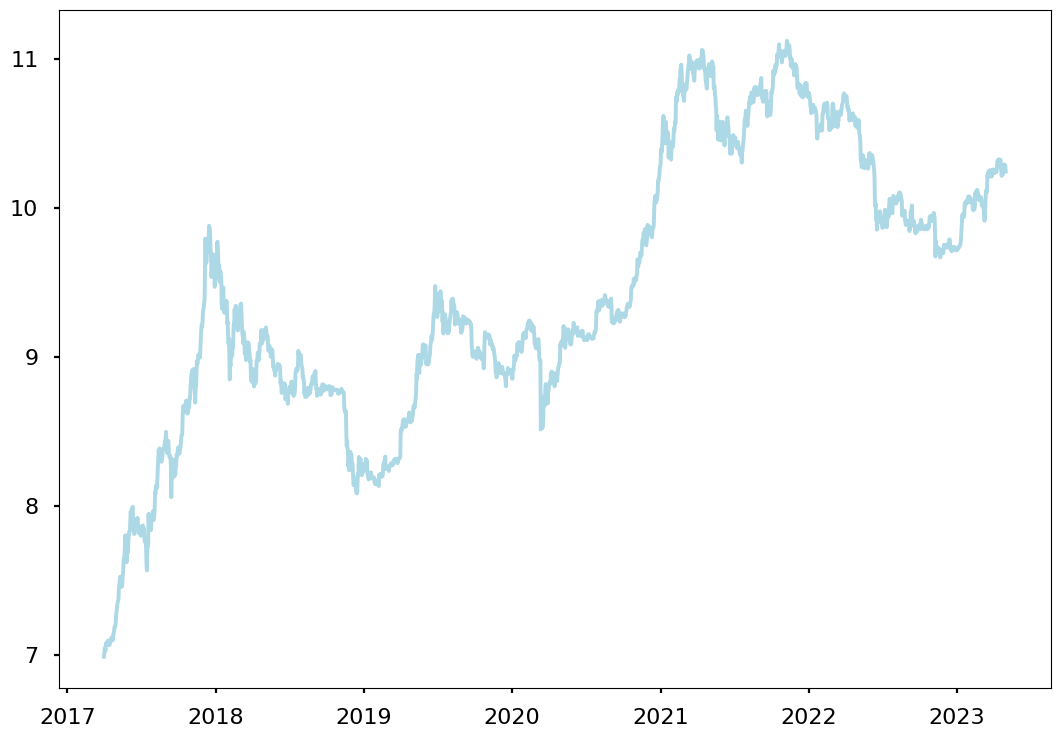

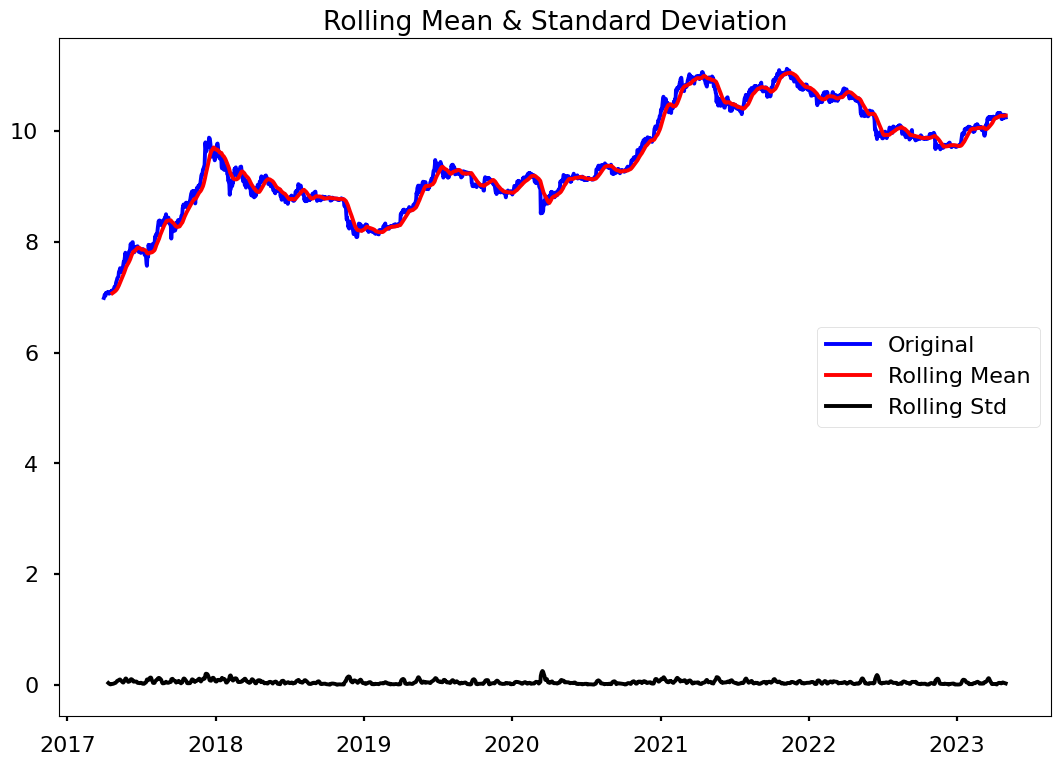

ADF Stastistic: -2.499738
p-value: 0.115538
The data is non stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [38]:
train_log = np.log(train_set['Close'])
plot.plot(train_log,color="lightblue")
plot.show()

AUGMENTED_DICKY_FULLER_TEST(train_log)

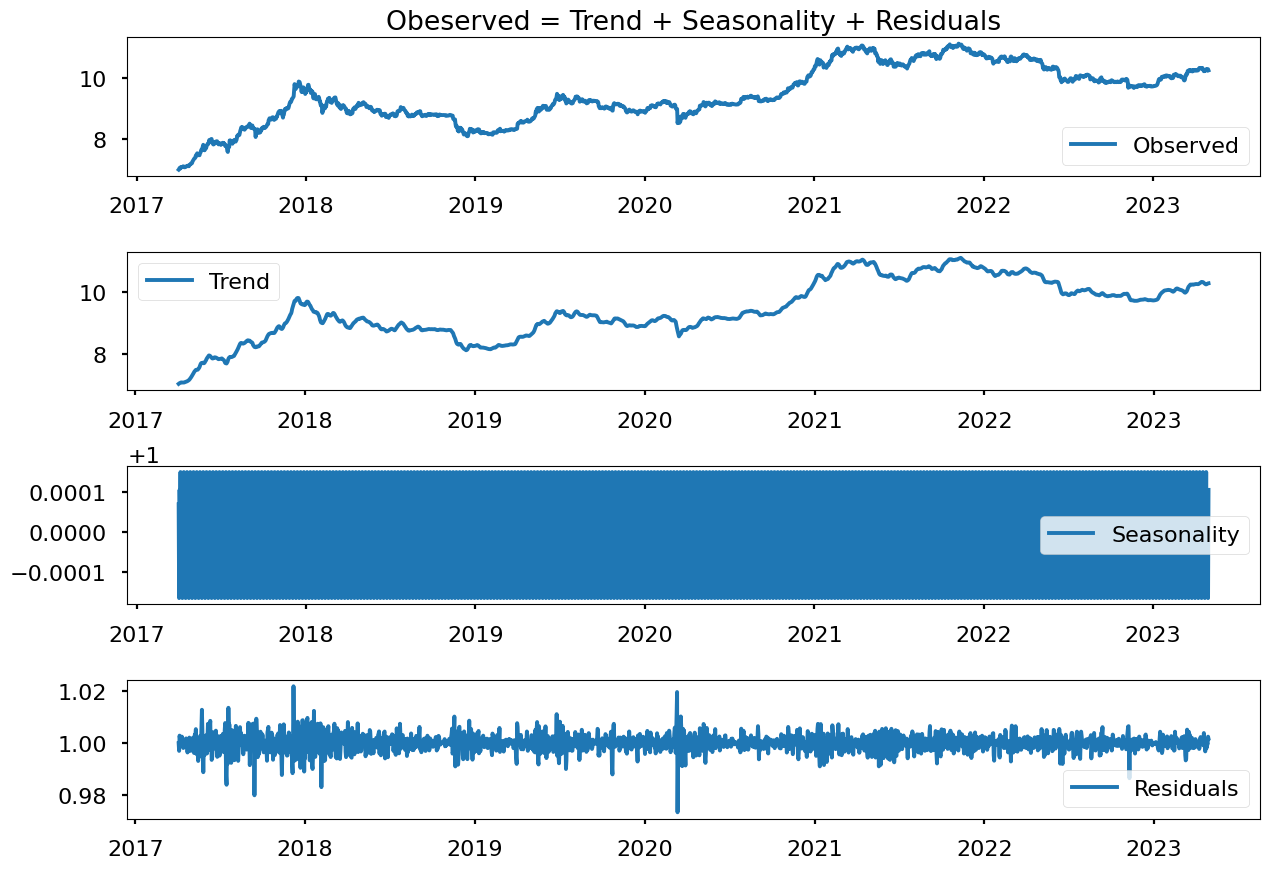

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(train_log , model='multiplicative')

trends = decomposition.trend
seasonals = decomposition.seasonal
residuals = decomposition.resid


plot.subplot(411)
plot.title('Obeserved = Trend + Seasonality + Residuals')
plot.plot(train_log ,label='Observed')
plot.legend(loc='best')
plot.subplot(412)
plot.plot(trends, label='Trend')
plot.legend(loc='best')
plot.subplot(413)
plot.plot(seasonals,label='Seasonality')
plot.legend(loc='best')
plot.subplot(414)
plot.plot(residuals, label='Residuals')
plot.legend(loc='best')
plot.tight_layout()
plot.show()

# Remove trend and seasonality with differencing

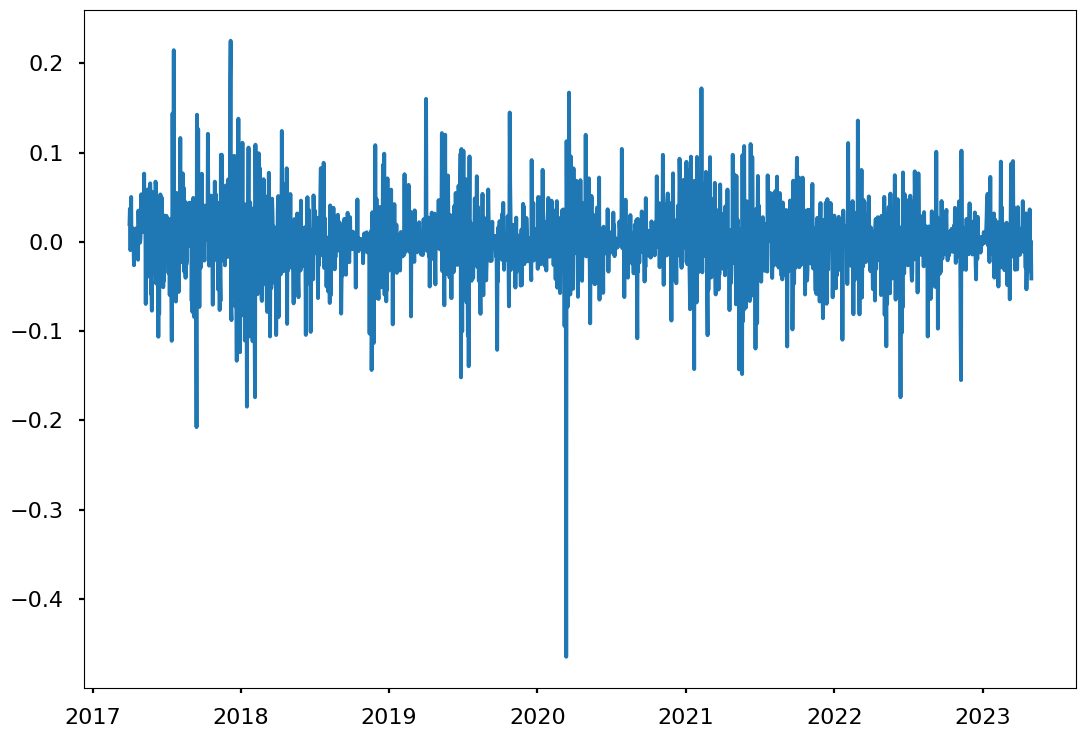

In [40]:

train_log_diff = train_log  - train_log .shift()
plot.plot(train_log_diff)
plot.show()

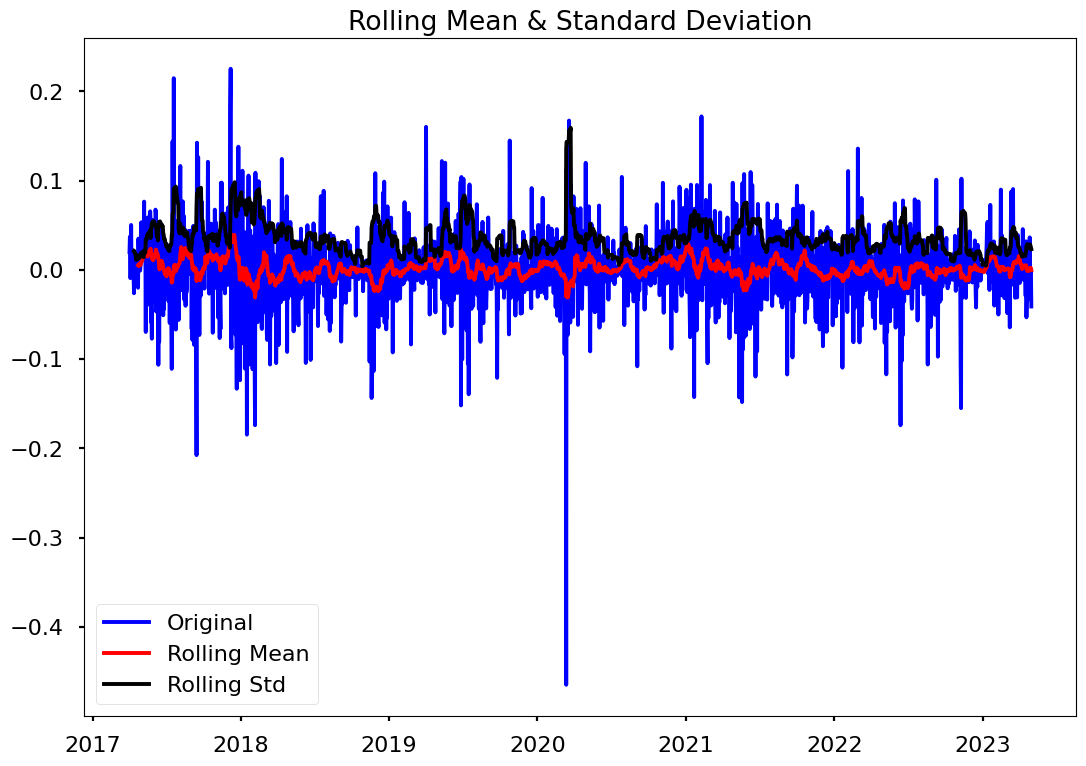

ADF Stastistic: -32.464940
p-value: 0.000000
The data is stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [41]:
train_log_diff.dropna(inplace=True)
AUGMENTED_DICKY_FULLER_TEST(train_log_diff)

# Plot the autocorreltaion and partial auto correlation functions

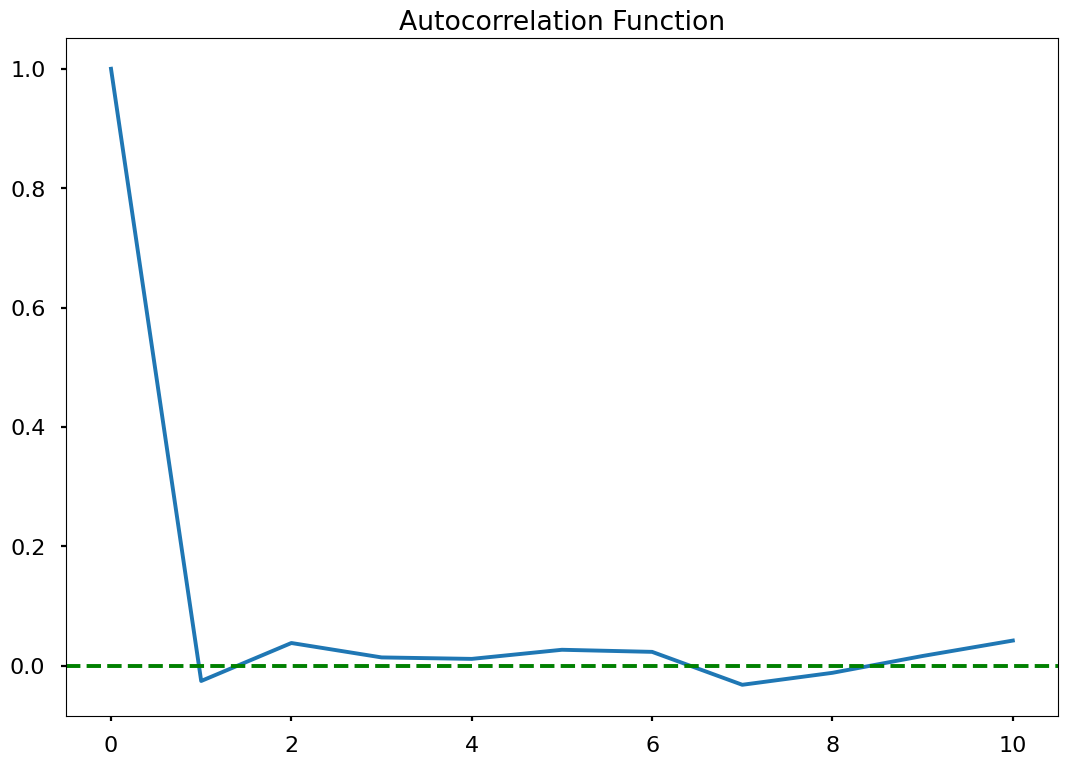

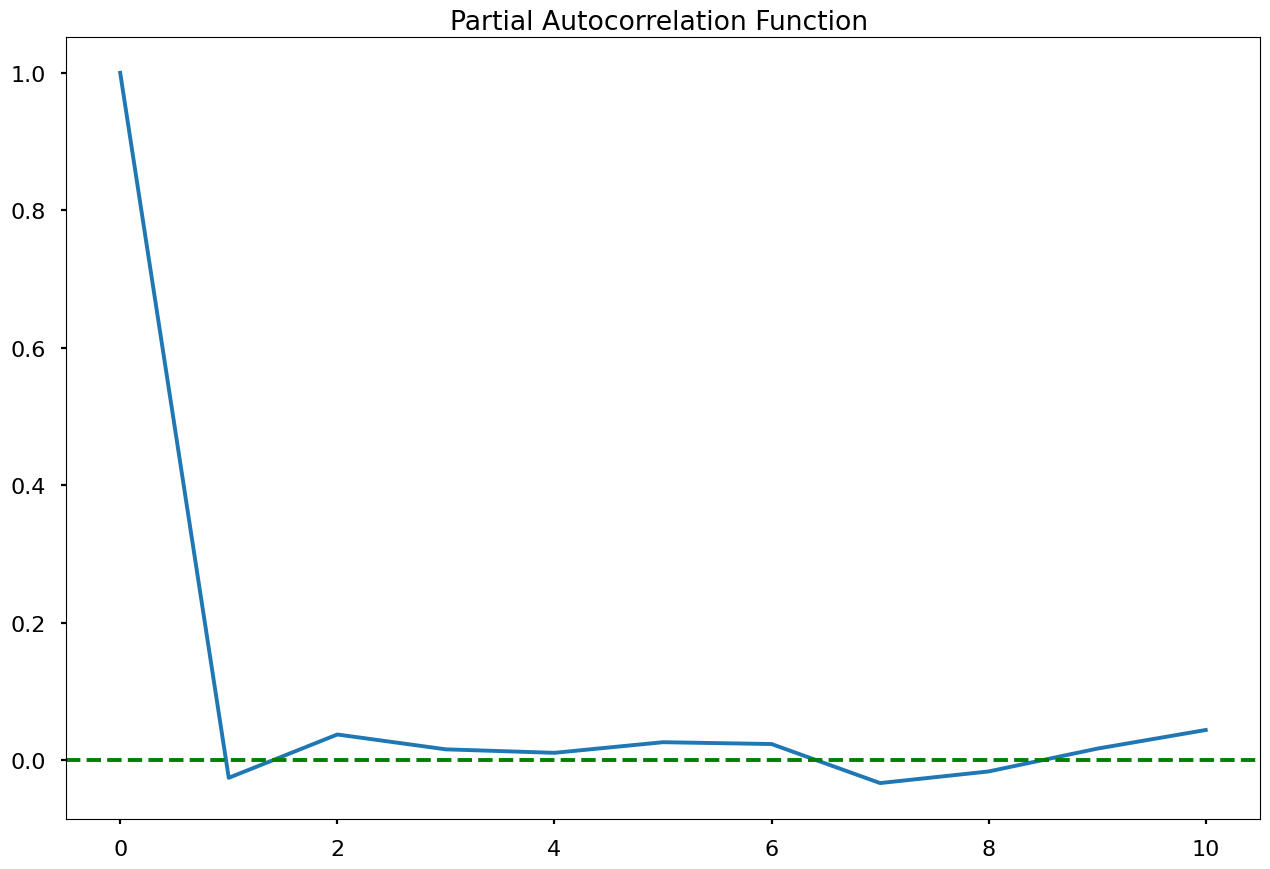

In [42]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

acf_lag = acf(train_log_diff, nlags=10)
pacf_lag = pacf(train_log_diff, nlags=10, method='ols')

#Plot Acf 
plot.subplot(1,1,1)
plot.plot(acf_lag)

plot.axhline(y=0,linestyle='--',color='g')
plot.title('Autocorrelation Function')
plot.show()

#Plot PACF:
plot.subplot(1,1,1)
plot.plot(pacf_lag)

plot.axhline(y=0,linestyle='--',color='green')
plot.title('Partial Autocorrelation Function ')
plot.tight_layout()
plot.show()

# AR MODEL

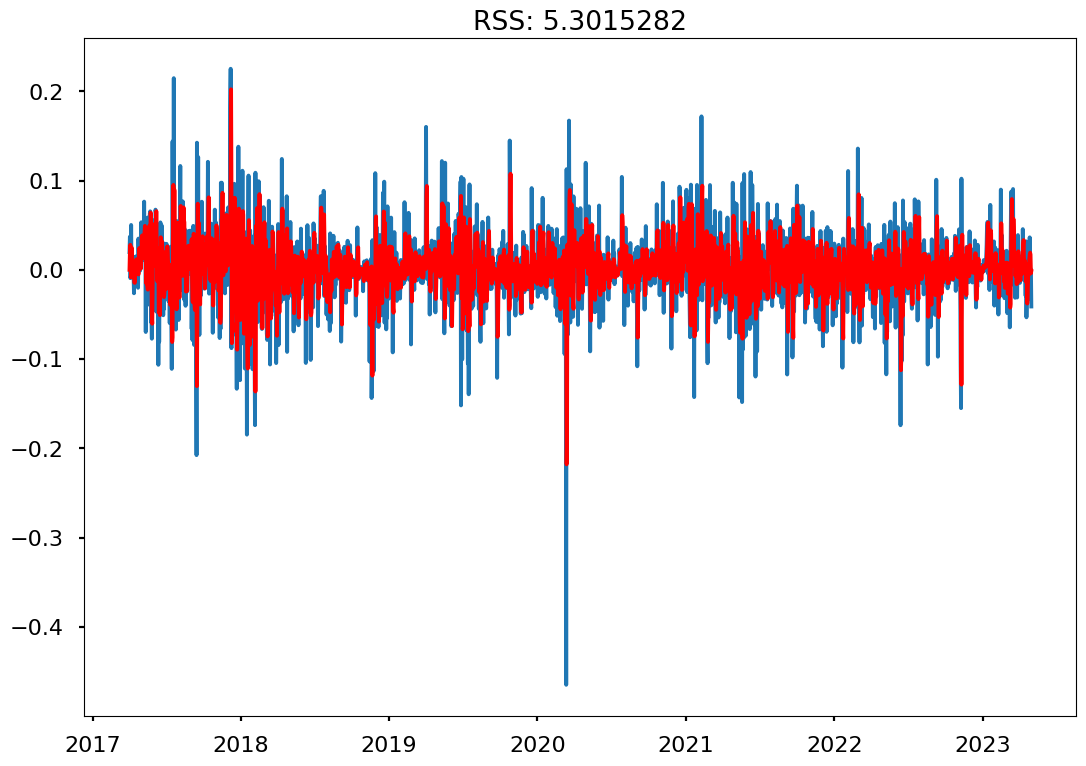

In [43]:

model = smapi.tsa.arima.ARIMA(train_log_diff, order=(1,1,0))  
results_AR = model.fit()  

plot.plot(train_log_diff)
plot.plot(results_AR.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_AR.fittedvalues - train_log_diff) **2))
plot.show()

In [44]:
print(results_AR.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2221
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3551.258
Date:                Wed, 03 May 2023   AIC                          -7098.515
Time:                        22:55:28   BIC                          -7087.105
Sample:                    04-02-2017   HQIC                         -7094.348
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5311      0.010    -51.520      0.000      -0.551      -0.511
sigma2         0.0024   3.48e-05     68.662      0.000       0.002       0.002
Ljung-Box (L1) (Q):                  69.52   Jarque-

In [45]:
# dir(results_ARIMA)
# results_ARIMA.fittedvalues
# results_ARIMA.fittedvalues-train_log_diff
# type(train_log_diff)
# train_log_diff
# a = train_log_diff.dropna()
# b = results_ARIMA.fittedvalues.dropna()
# b-a
results_AR.fittedvalues-train_log_diff


Date
2017-04-02   -0.019857
2017-04-03   -0.017227
2017-04-04    0.037210
2017-04-05    0.022848
2017-04-06   -0.058639
                ...   
2023-04-27   -0.019527
2023-04-28    0.023723
2023-04-29    0.020289
2023-04-30   -0.004575
2023-05-01    0.039715
Length: 2221, dtype: float64

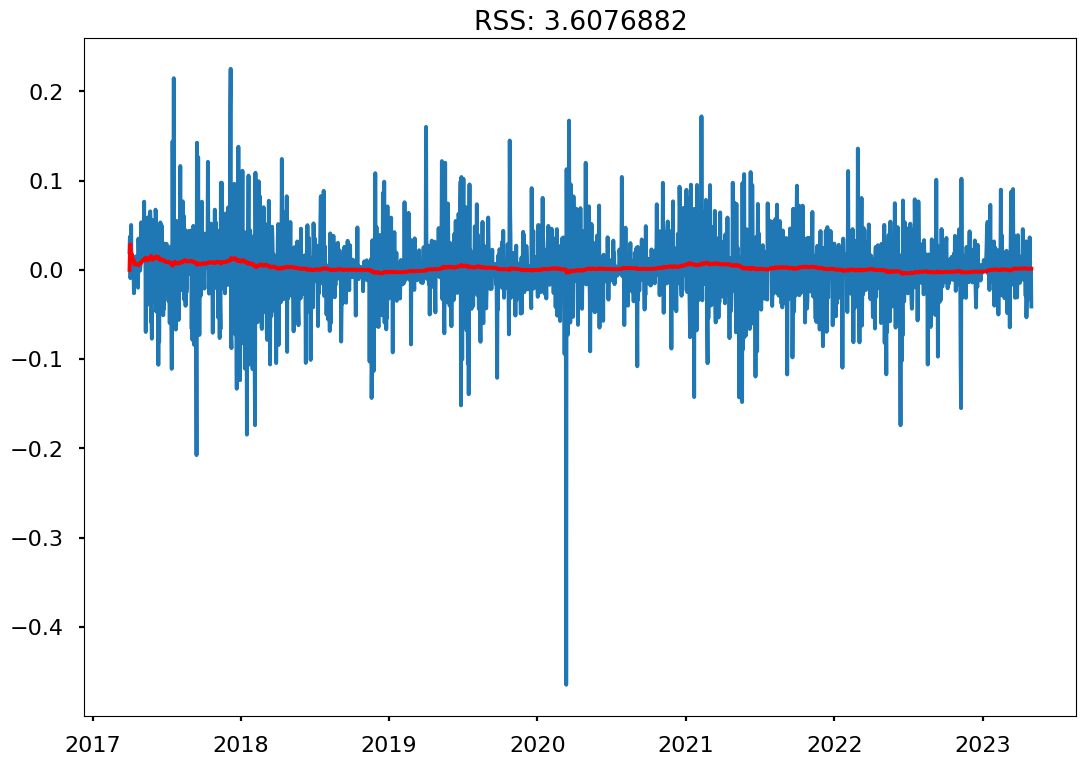

In [46]:
# Moving Average (MA) Model
model = smapi.tsa.arima.ARIMA(train_log_diff, order=(0,1,1))  
results_MA = model.fit()  

plot.plot(train_log_diff)
plot.plot(results_MA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_MA.fittedvalues - train_log_diff)**2))
plot.show()

In [47]:
print(results_MA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2221
Model:                 ARIMA(0, 1, 1)   Log Likelihood                3977.723
Date:                Wed, 03 May 2023   AIC                          -7951.446
Time:                        22:55:31   BIC                          -7940.036
Sample:                    04-02-2017   HQIC                         -7947.278
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9937      0.002   -419.299      0.000      -0.998      -0.989
sigma2         0.0016   1.93e-05     83.891      0.000       0.002       0.002
Ljung-Box (L1) (Q):                   2.20   Jarque-

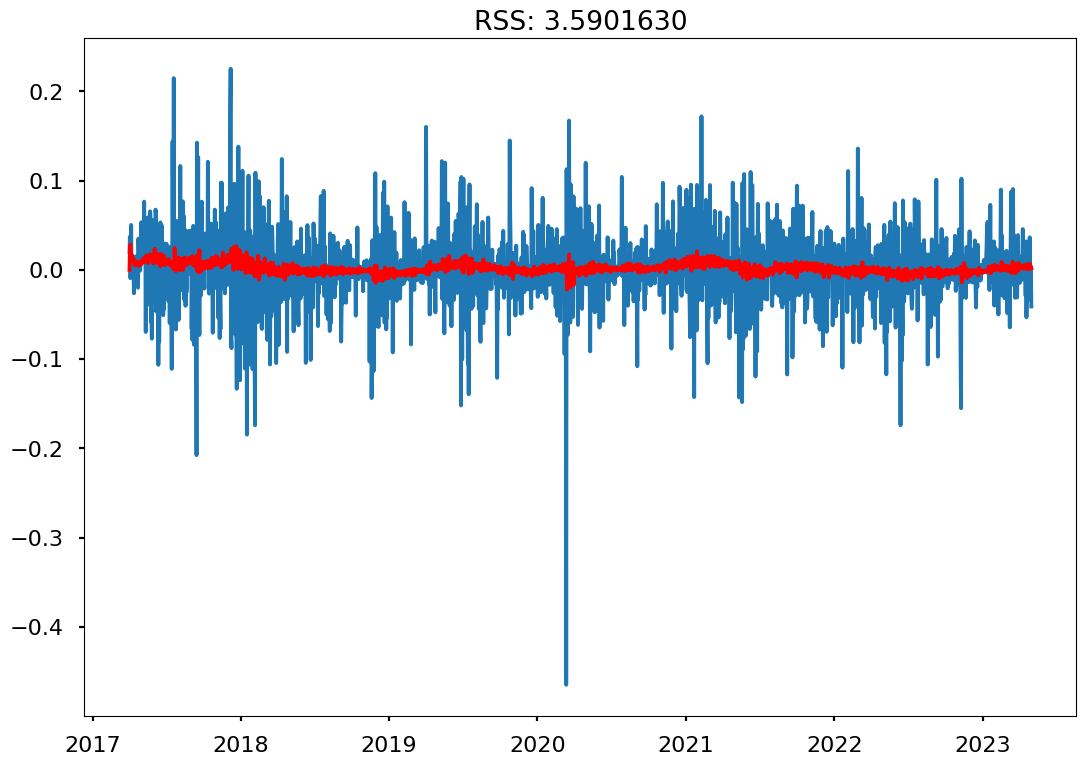

In [48]:
# ARIMA MODEL
# from statsmodels.tsa.arima.model import ARIMA

model = smapi.tsa.arima.ARIMA(train_log_diff, order=(11,1, 5))  
results_ARIMA = model.fit() 

plot.plot(train_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues - train_log_diff) **2))
plot.show()

In [49]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2221
Model:                ARIMA(11, 1, 5)   Log Likelihood                3983.015
Date:                Wed, 03 May 2023   AIC                          -7932.031
Time:                        22:55:51   BIC                          -7835.041
Sample:                    04-02-2017   HQIC                         -7896.606
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1950      0.773     -1.547      0.122      -2.709       0.319
ar.L2         -1.0831      0.732     -1.479      0.139      -2.519       0.352
ar.L3         -0.8489      0.492     -1.725      0.0

In [50]:
from statsmodels.tsa.arima_model import ARIMA
size = int(len(train_log)-100)
train_arima, test_arima = train_log[0:size], train_log[size:len(train_log)]

history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test_arima)):
  model = smapi.tsa.arima.ARIMA(history, order=(2, 1, 0))
  model_fit = model.fit()

  output = model_fit.forecast()
  pred_value = output[0]

  original_val = test_arima[t]
  history.append(original_val)

  pred_val = np.exp(pred_value)
  original_val = np.exp(original_val)

  error = ((abs(pred_val - original_val)) / original_val) * 100
  error_list.append(error)
  print('predicted = %f,   expected = %f,   error = %f ' % (pred_val, original_val, error), '%')

  predictions.append(float(pred_val))
  originals.append(float(original_val))
    
print('\n Means Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')


Printing Predicted vs Expected Values...


predicted = 22837.870264,   expected = 22720.415629,   error = 0.516956  %
predicted = 22725.632929,   expected = 22934.431464,   error = 0.910415  %
predicted = 22926.972171,   expected = 22636.469311,   error = 1.283340  %
predicted = 22651.770909,   expected = 23117.859682,   error = 2.016142  %
predicted = 23094.435846,   expected = 23032.777599,   error = 0.267698  %
predicted = 23053.213640,   expected = 23078.727880,   error = 0.110553  %
predicted = 23074.373706,   expected = 23031.089776,   error = 0.187937  %
predicted = 23034.001532,   expected = 23774.565923,   error = 3.114944  %
predicted = 23754.047417,   expected = 22840.138907,   error = 4.001326  %
predicted = 22890.623729,   expected = 23139.283910,   error = 1.074623  %
predicted = 23096.527262,   expected = 23723.769653,   error = 2.643941  %
predicted = 23720.540281,   expected = 23471.870441,   error = 1.059438  %
predicted = 23500.215875,   expected = 23449.321622,   er

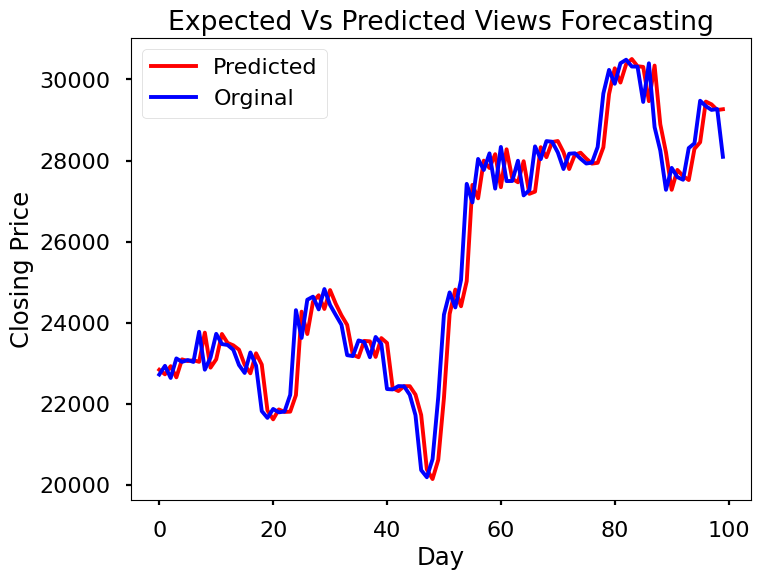

In [51]:
plot.figure(figsize=(8, 6))
test = [t for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test, predictions, color= 'red')
plot.plot(test, originals, color = 'blue')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()